In [1]:
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import ast

In [2]:
df  = pd.read_csv('DataBase.csv')
df.head()

,device,kernel
0,"{'time': 11.88, 'vy': 2.463921, 'px': 519.9364...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."
1,"{'time': 11.88, 'vy': 2.463921, 'px': 519.9364...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."
2,"{'time': 11.946, 'vy': 3.651046, 'px': 527.964...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."
3,"{'time': 11.946, 'vy': 3.651046, 'px': 527.964...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."
4,"{'time': 11.966, 'vy': 4.045748, 'px': 530.620...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."


# TRATAMENTO DE DADOS

In [3]:
df = df.head(20000).copy()

In [4]:
device = df.device.apply(ast.literal_eval).apply(pd.Series)
device

,time,vy,px,py,pz,pitch,roll,yaw,wz,vz,wx,wy,ax,ay,az,vx
0,11.880,2.463921,519.9364,-60.03761,-3032.697,-1.220448,2.196609,-3.113933,0.011022,-313.0473,-0.021614,-0.039844,-3.781458,7.948509,-3.999054,53.80488
1,11.880,2.463921,519.9364,-60.03761,-3032.697,-1.220448,2.196609,-3.113933,0.011022,-313.0473,-0.021614,-0.039844,-3.781458,7.948509,-3.999054,53.80488
2,11.946,3.651046,527.9641,-59.57883,-3079.698,-1.211963,2.197044,-3.114232,0.021288,-313.6309,0.040720,-0.008501,-3.833396,7.874256,-3.805874,53.23049
3,11.946,3.651046,527.9641,-59.57883,-3079.698,-1.211963,2.197044,-3.114232,0.021288,-313.6309,0.040720,-0.008501,-3.833396,7.874256,-3.805874,53.23049
4,11.966,4.045748,530.6208,-59.38641,-3095.385,-1.209179,2.198069,-3.114118,0.020669,-313.8217,0.065021,-0.010798,-3.812039,7.913806,-3.825991,53.03935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3711,58.768,802.934000,14705.5300,48196.43000,-62626.350,-0.158645,-3.112156,2.765966,0.017913,-797.8779,-0.008350,-0.004046,3.055393,-0.569331,-18.828750,220.23090
3712,58.788,802.905600,14716.5500,48236.57000,-62666.270,-0.162377,-3.111279,2.765434,0.018750,-798.8156,-0.007895,-0.004318,3.055700,-0.566352,-18.679500,220.38370
3713,58.788,802.905600,14716.5500,48236.57000,-62666.270,-0.162377,-3.111279,2.765434,0.018750,-798.8156,-0.007895,-0.004318,3.055700,-0.566352,-18.679500,220.38370
3714,58.808,802.877300,14727.5700,48276.71000,-62706.230,-0.166081,-3.110385,2.764894,0.019019,-799.7418,-0.006822,-0.005678,3.050014,-0.566727,-18.365560,220.53630


In [5]:
kernel = df.kernel.apply(ast.literal_eval).apply(pd.Series)
kernel

,pitch,roll,yaw,wx,wy,wz,ax,ay,az
0,0.00,0.00,0.00,-153.0,102.0,15.0,213.0,26.0,-481.0
1,0.00,0.00,0.00,-153.0,102.0,15.0,213.0,26.0,-481.0
2,0.00,0.00,0.00,-153.0,102.0,15.0,213.0,26.0,-481.0
3,0.00,0.00,0.00,-153.0,102.0,15.0,213.0,26.0,-481.0
4,0.00,0.00,0.00,-153.0,102.0,15.0,213.0,26.0,-481.0
...,...,...,...,...,...,...,...,...,...
3711,-12.13,-159.39,22.48,0.0,-4.0,4.0,182.0,5.0,-463.0
3712,-12.06,-159.38,22.48,3.0,-2.0,3.0,182.0,4.0,-464.0
3713,-12.06,-159.38,22.48,3.0,-2.0,3.0,182.0,4.0,-464.0
3714,-12.06,-159.38,22.48,3.0,-2.0,3.0,182.0,4.0,-464.0


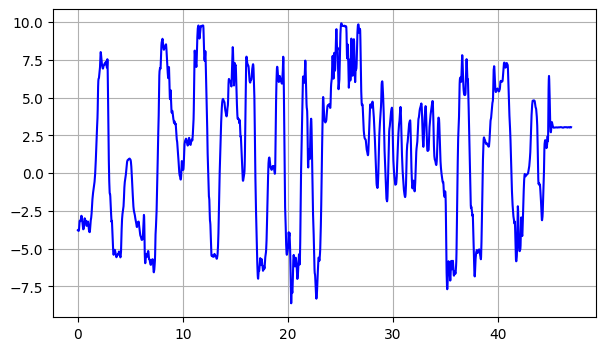

In [8]:
device['time'] = device.time - device.time.values[0]

plt.figure(figsize=(7, 4))
plt.plot(device.time, device.ax, color='blue')
plt.grid()

In [9]:
print(float(np.round(device.time.diff().median(), 3)))
dt = 0.020

0.02


# LIMITES

In [10]:
SAMPLE_RANGE = (10, 50)
kernel['time'] = device.time

device = device.copy().loc[(device.time >= SAMPLE_RANGE[0]) & (device.time <= SAMPLE_RANGE[1])]
kernel = kernel.copy().loc[(kernel.time >= SAMPLE_RANGE[0]) & (kernel.time <= SAMPLE_RANGE[1])]

device['time'] = device.time - device.time.values[0]
kernel['time'] = kernel.time - kernel.time.values[0]

In [11]:
device.head()

,time,vy,px,py,pz,pitch,roll,yaw,wz,vz,wx,wy,ax,ay,az,vx
775,0.00,164.9397,1610.170,2341.927,-11810.08,0.086189,2.056927,-2.515946,0.055204,-410.5733,-1.071739,0.199790,0.207303,8.949033,-5.085014,48.71566
776,0.00,164.9397,1610.170,2341.927,-11810.08,0.086189,2.056927,-2.515946,0.055204,-410.5733,-1.071739,0.199790,0.207303,8.949033,-5.085014,48.71566
777,0.02,165.3871,1612.606,2350.185,-11830.62,0.079350,2.035281,-2.512603,0.051442,-410.8198,-1.103871,0.210649,0.222373,8.948546,-4.776782,48.72640
778,0.04,165.8349,1615.043,2358.466,-11851.16,0.072372,2.012330,-2.509484,0.080067,-411.0423,-1.103428,0.214355,0.299477,8.960695,-4.123116,48.73944
779,0.06,166.2846,1617.480,2366.769,-11871.72,0.064280,1.990471,-2.507209,0.184403,-411.2307,-1.006460,0.215170,0.519921,9.028408,-3.412314,48.75993


In [12]:
kernel.head()

,pitch,roll,yaw,wx,wy,wz,ax,ay,az,time
775,48.15,-133.18,28.72,-734.0,56.0,219.0,-22.0,463.0,-111.0,0.00
776,48.81,-131.53,30.83,-733.0,15.0,246.0,-4.0,469.0,-83.0,0.00
777,49.68,-128.08,35.11,-588.0,130.0,306.0,13.0,478.0,-28.0,0.02
778,49.68,-128.08,35.11,-588.0,130.0,306.0,13.0,478.0,-28.0,0.04
779,49.68,-128.08,35.11,-588.0,130.0,306.0,13.0,478.0,-28.0,0.06


# ANÁLISE

In [13]:
key = 'wx'

kernelData = np.array(kernel[key]) 
sensorData = np.array(device[key])

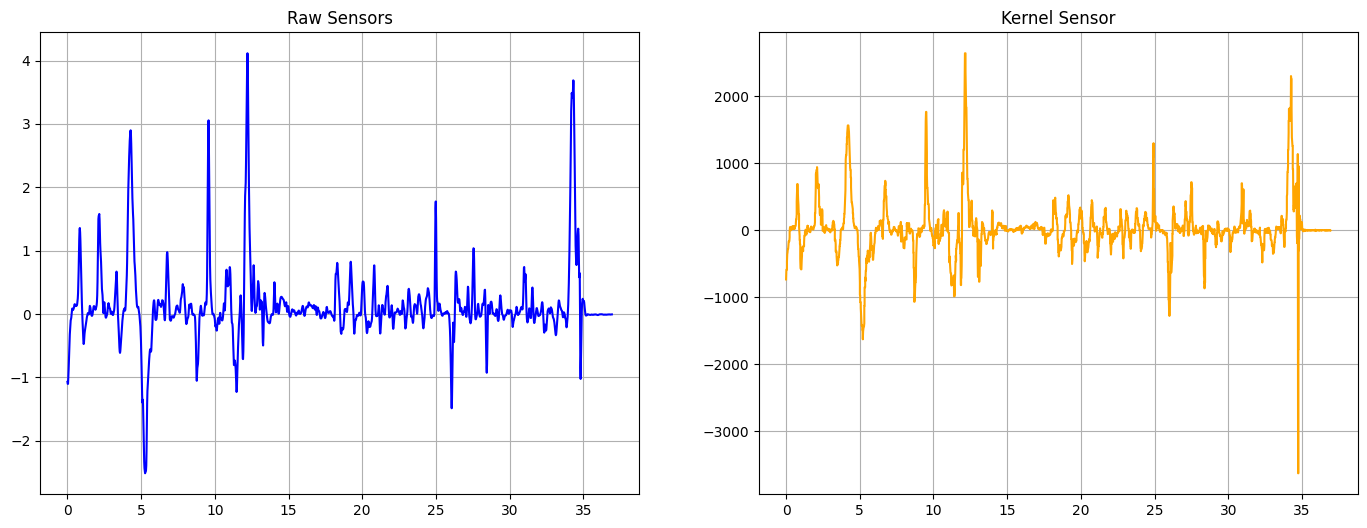

In [14]:
plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
plt.plot(device.time, sensorData, color='blue')
plt.title('Raw Sensors')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(kernel.time, kernelData, color='orange')
plt.title('Kernel Sensor')
plt.grid()

- Comparação normalizada com erro relacionado à distancia entre os pontos

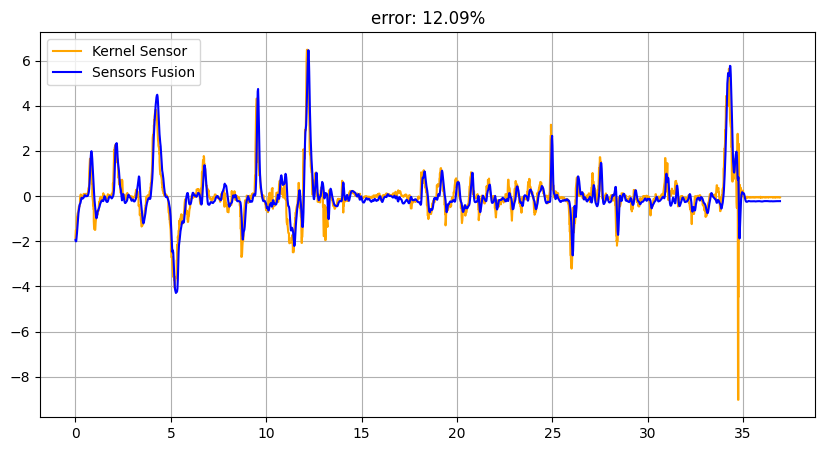

In [15]:
def normalize(data):
    return np.array(data - np.mean(data))/np.std(data)

def compare(data1, data2):
    data1 = normalize(data1)
    data2 = normalize(data2)
    score = wasserstein_distance(data1, data2)
    return data1, data2, score


k, s, score = compare(kernelData, sensorData)
plt.figure(figsize=(10, 5))
plt.plot(kernel.time, k, color='orange', label='Kernel Sensor')
plt.plot(device.time, s, color='blue',  label='Sensors Fusion')
plt.title(f'error: {score*100:.2f}%')
plt.legend(), plt.grid()
plt.show()

# TENTANDO CALCULAR PITCH, ROLL E YAW

In [16]:
import math
DEG2RAD = math.pi / 180.0

class Quaternion:
    def __init__(self, w=1.0, x=0.0, y=0.0, z=0.0):
        # Componentes do quaternion (w: escalar, x, y, z: vetoriais)
        self.w = float(w)
        self.x = float(x)
        self.y = float(y)
        self.z = float(z)

    def __mul__(self, other):
        """Multiplicação de quaternions (ou quaternion por escalar)."""
        if isinstance(other, Quaternion):
            # Produto de Hamilton: self * other
            return Quaternion(
                self.w * other.w - self.x * other.x - self.y * other.y - self.z * other.z,
                self.w * other.x + self.x * other.w + self.y * other.z - self.z * other.y,
                self.w * other.y - self.x * other.z + self.y * other.w + self.z * other.x,
                self.w * other.z + self.x * other.y - self.y * other.x + self.z * other.w
            )
        else:
            # Produto por escalar
            return Quaternion(self.w * other, self.x * other, self.y * other, self.z * other)

    __rmul__ = __mul__  # permite escalar * quaternion

    def __add__(self, other):
        """Soma elemento a elemento de dois quaternions."""
        return Quaternion(self.w + other.w, self.x + other.x, self.y + other.y, self.z + other.z)

    def conj(self):
        """Conjugado do quaternion (inverte a rotação)."""
        return Quaternion(self.w, -self.x, -self.y, -self.z)

    def norm(self):
        """Norma (magnitude) do quaternion."""
        return math.sqrt(self.w**2 + self.x**2 + self.y**2 + self.z**2)

    def normalize(self):
        """Normaliza o quaternion para unidade (mantendo direção de rotação)."""
        n = self.norm()
        if n == 0:
            return  # evita divisão por zero
        self.w /= n
        self.x /= n
        self.y /= n
        self.z /= n


class Orientation:
    """
    Filtro Madgwick 6‑DOF (gyro+accel) para Raspberry Pi Pico / MicroPython
    • Faz a conversão opcional de °/s → rad/s
    • Permite inverter cada eixo uma única vez na entrada
    • Mantém dt automático (passado a cada update) ou fixo
    """
    def __init__(self, dt=0.02, beta=0.1, gyro_is_deg=True):
        self.q     = Quaternion()
        self.beta  = beta
        self.dt    = dt          # usado se não passar dt dinâmico
        self.g_deg = gyro_is_deg
        self.pitch = self.roll = self.yaw = 0.0

    def update(self, gx, gy, gz, ax, ay, az, dt=None):
        if self.g_deg:        # converte para rad/s se veio em graus
            gx *= DEG2RAD; gy *= DEG2RAD; gz *= DEG2RAD
        if dt is None:        # permite passar dt medido em tempo real
            dt = self.dt

        # === resto é exatamente o Madgwick IMU, idêntico ao seu ===
        q1,q2,q3,q4 = self.q.w, self.q.x, self.q.y, self.q.z
        norm = math.sqrt(ax*ax + ay*ay + az*az)
        if norm == 0: return
        ax, ay, az = ax/norm, ay/norm, az/norm

        _2q1, _2q2, _2q3, _2q4 = 2*q1, 2*q2, 2*q3, 2*q4
        _4q1, _4q2, _4q3       = 4*q1, 4*q2, 4*q3
        _8q2, _8q3             = 8*q2, 8*q3
        q1q1,q2q2,q3q3,q4q4    = q1*q1,q2*q2,q3*q3,q4*q4

        s1 = _4q1*q3q3 + _2q3*ax + _4q1*q2q2 - _2q2*ay
        s2 = _4q2*q4q4 - _2q4*ax + 4*q1q1*q2 - _2q1*ay - _4q2 + _8q2*(q2q2+q3q3) + _4q2*az
        s3 = 4*q1q1*q3 + _2q1*ax + _4q3*q4q4 - _2q4*ay - _4q3 + _8q3*(q2q2+q3q3) + _4q3*az
        s4 = 4*q2q2*q4 - _2q2*ax + 4*q3q3*q4 - _2q3*ay
        norm_s = math.sqrt(s1*s1 + s2*s2 + s3*s3 + s4*s4)
        if norm_s == 0: return
        s1,s2,s3,s4 = s1/norm_s, s2/norm_s, s3/norm_s, s4/norm_s

        qDot1 = 0.5*(-q2*gx - q3*gy - q4*gz) - self.beta*s1
        qDot2 = 0.5*( q1*gx + q3*gz - q4*gy) - self.beta*s2
        qDot3 = 0.5*( q1*gy - q2*gz + q4*gx) - self.beta*s3
        qDot4 = 0.5*( q1*gz + q2*gy - q3*gx) - self.beta*s4
        q1 += qDot1*dt; q2 += qDot2*dt; q3 += qDot3*dt; q4 += qDot4*dt
        self.q = Quaternion(q1,q2,q3,q4); self.q.normalize()
        self._quat_to_euler()

    def _quat_to_euler(self):
        q = self.q
        sinr_cosp = 2*(q.w*q.x + q.y*q.z)
        cosr_cosp = 1 - 2*(q.x*q.x + q.y*q.y)
        self.roll = math.atan2(sinr_cosp, cosr_cosp)

        sinp = 2*(q.w*q.y - q.z*q.x)
        self.pitch = math.copysign(math.pi/2, sinp) if abs(sinp) >= 1 else math.asin(sinp)

        siny_cosp = 2*(q.w*q.z + q.x*q.y)
        cosy_cosp = 1 - 2*(q.y*q.y + q.z*q.z)
        self.yaw = math.atan2(siny_cosp, cosy_cosp)



orientation = Orientation(dt=0.02, beta=0.2)
eulerData   = []

for i in range(len(device.ax)):
    orientation.update(device.wx.values[i], device.wy.values[i], device.wz.values[i], device.ax.values[i], device.ay.values[i], device.az.values[i])
    eulerData.append([orientation.pitch, orientation.roll, orientation.yaw])


device['pitch'] = [e[0] for e in eulerData]
device['roll']  = [e[1] for e in eulerData]
device['yaw']   = [e[2] for e in eulerData]

# COMPARANDO PITCH, ROLL, YAW

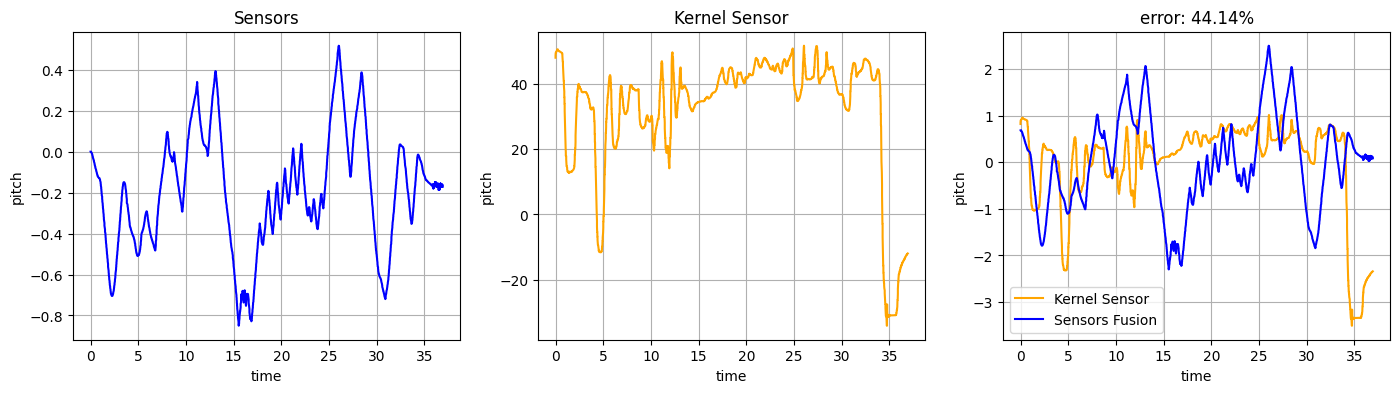

In [17]:
plt.figure(figsize=(17, 4))
plt.subplot(1, 3, 1)
plt.plot(device.time, device.pitch, color='blue')
plt.title('Sensors'), plt.xlabel('time'), plt.ylabel('pitch')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(kernel.time, kernel.pitch, color='orange')
plt.title('Kernel Sensor'), plt.xlabel('time'), plt.ylabel('pitch')
plt.grid()

plt.subplot(1, 3, 3)
k, s, score = compare(kernel.pitch, device.pitch)
plt.plot(kernel.time, k, color='orange', label='Kernel Sensor')
plt.plot(device.time, s, color='blue',  label='Sensors Fusion')
plt.title(f'error: {score*100:.2f}%'), plt.xlabel('time'), plt.ylabel('pitch')
plt.legend(), plt.grid()
plt.show()

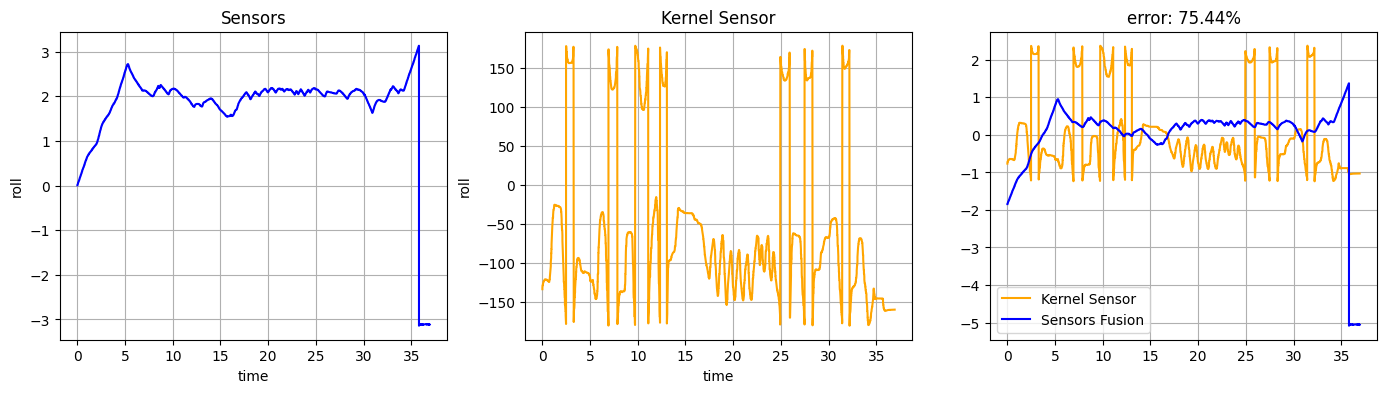

In [18]:
plt.figure(figsize=(17, 4))
plt.subplot(1, 3, 1)
plt.plot(device.time, device.roll, color='blue')
plt.title('Sensors'), plt.xlabel('time'), plt.ylabel('roll')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(kernel.time, kernel.roll, color='orange')
plt.title('Kernel Sensor'), plt.xlabel('time'), plt.ylabel('roll')
plt.grid()

plt.subplot(1, 3, 3)
k, s, score = compare(kernel.roll, device.roll)
plt.plot(kernel.time, k, color='orange', label='Kernel Sensor')
plt.plot(device.time, s, color='blue',  label='Sensors Fusion')
plt.title(f'error: {score*100:.2f}%')
plt.legend(), plt.grid()
plt.show()

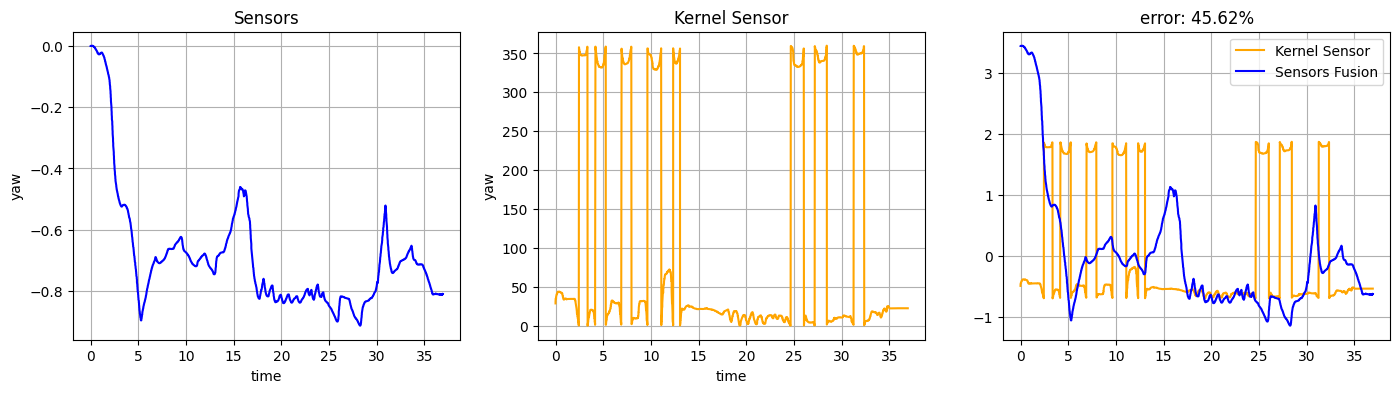

In [19]:
plt.figure(figsize=(17, 4))
plt.subplot(1, 3, 1)
plt.plot(device.time, device.yaw, color='blue')
plt.title('Sensors'), plt.xlabel('time'), plt.ylabel('yaw')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(kernel.time, kernel.yaw, color='orange')
plt.title('Kernel Sensor'), plt.xlabel('time'), plt.ylabel('yaw')
plt.grid()

plt.subplot(1, 3, 3)
k, s, score = compare(kernel.yaw, device.yaw)
plt.plot(kernel.time, k, color='orange', label='Kernel Sensor')
plt.plot(device.time, s, color='blue',  label='Sensors Fusion')
plt.title(f'error: {score*100:.2f}%')
plt.legend(), plt.grid()
plt.show()